<a href="https://colab.research.google.com/github/ezhatiara/customer-churn-prediction/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Churn

**Background**

Within the fiercely competitive telecommunications industry, companies are consistently striving to maintain their customer base. One of the primary challenges they face is Customer Churn, which poses a continual threat to revenue streams and brand reputation.

**Goal**

The objective of Customer Churn Prediction is pivotal, seeking to mitigate revenue losses, fortify customer retention initiatives, optimize operational efficiencies, elevate overall customer experience, and establish a sustainable competitive advantage in the market.

**Objective**

- To discern underlying patterns of customer churn.
- To develop machine learning models capable of accurately predicting churn events.

# Load Data

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [3]:
df_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
features = df_train.columns
print('data features : \n', features)

data features : 
 Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


# Exploratory Data Analysis


In [5]:
size = df_train.shape

num_rows = size[0]
num_columns = size[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 4250
Number of columns: 20


**Data Overview**

In [6]:
df_summary = pd.DataFrame({
  'column': df_train.columns,
  'datatype': df_train.dtypes,
  'unique_values': df_train.nunique(),
  'unique_sample': df_train.columns.map(lambda col: df_train[col].unique()[:5]),
})

df_summary


,column,datatype,unique_values,unique_sample
state,state,object,51,"[OH, NJ, OK, MA, MO]"
account_length,account_length,int64,215,"[107, 137, 84, 75, 121]"
area_code,area_code,object,3,"[area_code_415, area_code_408, area_code_510]"
international_plan,international_plan,object,2,"[no, yes]"
voice_mail_plan,voice_mail_plan,object,2,"[yes, no]"
number_vmail_messages,number_vmail_messages,int64,46,"[26, 0, 24, 37, 27]"
total_day_minutes,total_day_minutes,float64,1843,"[161.6, 243.4, 299.4, 166.7, 218.2]"
total_day_calls,total_day_calls,int64,120,"[123, 114, 71, 113, 88]"
total_day_charge,total_day_charge,float64,1843,"[27.47, 41.38, 50.9, 28.34, 37.09]"
total_eve_minutes,total_eve_minutes,float64,1773,"[195.5, 121.2, 61.9, 148.3, 348.5]"


**Numerical data**

In [7]:
num_cols = [col for col in df_train.columns if pd.api.types.is_numeric_dtype(df_train[col])]
print("numerical columns:")
for col in num_cols:
    print(col)

numerical columns:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


Descriptions of the columns:

1. **account_length**: The duration of the customer's account in months.
2. **number_vmail_messages**: The number of voicemail messages received by the customer.
3. **total_day_minutes**: The total number of minutes used by the customer during the day.
4. **total_day_calls**: The total number of calls made by the customer during the day.
5. **total_day_charge**: The total charge incurred by the customer for usage during the day.
6. **total_eve_minutes**: The total number of minutes used by the customer during the evening.
7. **total_eve_calls**: The total number of calls made by the customer during the evening.
8. **total_eve_charge**: The total charge incurred by the customer for usage during the evening.
9. **total_night_minutes**: The total number of minutes used by the customer during the night.
10. **total_night_calls**: The total number of calls made by the customer during the night.
11. **total_night_charge**: The total charge incurred by the customer for usage during the night.
12. **total_intl_minutes**: The total number of minutes used by the customer for international calls.
13. **total_intl_calls**: The total number of international calls made by the customer.
14. **total_intl_charge**: The total charge incurred by the customer for international calls.
15. **number_customer_service_calls**: The number of calls made by the customer to customer service.

In [8]:
# Descriptive Statistical Summary for Numeric Columns
print("Descriptive Statistical Summary:")
descriptions_numerical = df_train[num_cols].describe().T
descriptions_numerical['skewness'] = df_train[num_cols].skew()

# Calculating Range
range_values = df_train[num_cols].max() - df_train[num_cols].min()
descriptions_numerical['range'] = range_values

descriptions_numerical

Descriptive Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,skewness,range
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,0.122327,242.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,1.373091,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,-0.006910,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,-0.085812,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,-0.006913,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,-0.030415,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,-0.020812,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,-0.030388,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,0.008491,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,0.005273,175.00


**Categorical columns**

In [9]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
for col in cat_cols:
  print(col)

Categorical columns:
state
area_code
international_plan
voice_mail_plan
churn


**Column Descriptions:**

1. **State**: Indicates the state of residence of the customer, with 51 different states represented in the dataset.

2. **Area Code**: Represents the area code assigned to the customer, categorized as area_code_415, area_code_408, and area_code_510.

3. **International Plan**: Indicates whether the customer has subscribed to an international plan — 'yes' or 'no'.

4. **Voice Mail Plan**: Indicates the subscription status of the customer to a voicemail plan — 'yes' or 'no'.

5. **Churn**: Describes whether the customer has left the service ('yes') or remains a subscriber ('no').

In [10]:
# Generate descriptive statistical summary for categorical columns in df_train
description_categorical = df_train.describe(include='object').T
description_categorical['value_counts'] = [df_train[col].value_counts().to_dict() for col in description_categorical.index]  # Proportion of each value
description_categorical

,count,unique,top,freq,value_counts
state,4250,51,WV,139,"{'WV': 139, 'MN': 108, 'ID': 106, 'AL': 101, '..."
area_code,4250,3,area_code_415,2108,"{'area_code_415': 2108, 'area_code_408': 1086,..."
international_plan,4250,2,no,3854,"{'no': 3854, 'yes': 396}"
voice_mail_plan,4250,2,no,3138,"{'no': 3138, 'yes': 1112}"
churn,4250,2,no,3652,"{'no': 3652, 'yes': 598}"


**Summary:**

* The dataset consists of 4250 rows and 20 columns.
* There are 15 numerical columns (data type: int and float) and 5 categorical columns (data type: object) in the dataset.

In [11]:
import plotly.express as px

def plot_pie_chart(data, column):
    counts = data[column].value_counts()
    fig = px.pie(names=counts.index, values=counts.values, title=f'pie chart of {column}', color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_layout(width=800, height=800)
    fig.show()
plot_pie_chart(df_train, 'churn')

** Insight:**

* The classes 'yes' and 'no' exhibit an imbalance, with significantly more instances labeled as 'no' (3,652) compared to 'yes' (598), indicating an uneven distribution.
* The percentage of customers who switched to another operator is 14%.


In [12]:
import plotly.express as px
cat_cols = [col for col in cat_cols if col != 'churn']
for feature in cat_cols:
    counts = df_train.groupby([feature, 'churn']).size().reset_index(name='count')
    total_data = counts['count'].sum()
    counts['percentage'] = (counts['count'] / total_data) * 100

    fig = px.bar(
        counts, x=feature,
        y='count', color='churn',
        title=f'comparison of {feature} by churn',
        text='percentage',
        color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

### Categorical Feature Comparison by Churn

The provided code utilizes Plotly Express to create bar plots comparing churn rates across different categories of categorical features.

**How it works:**
- For each categorical feature (`feature`) excluding 'churn':
    - Data is grouped by the feature and churn status to calculate counts and percentages.
    - Bar plots are generated using Plotly Express (`px.bar()`).
    - Each bar represents a category of the feature, colored by churn status.
    - The height of each bar indicates the count of instances, with percentages displayed as text on top.
    - The title of each plot reflects the comparison of the specific feature by churn status.

**Example Output:**
- The code is applied to visualize churn rates across various categorical features in the dataset.
- Each plot provides insights into how churn rates vary across different categories of the respective feature.

This visualization aids in understanding the impact of categorical variables on churn behavior.

In [13]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['churn_percentage'] = tab['yes'] / tab['All'] * 100
    tab.columns = [var, 'total','churn_no', 'churn_yes', 'churn_percentage']
    return tab
crosstab_function(df_train, 'international_plan')

,international_plan,total,churn_no,churn_yes,churn_percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


### Crosstab Function

The `crosstab_function` generates a cross-tabulation table between a specified categorical variable and churn status in the dataset.

**How it works:**
- It uses `pd.crosstab()` to create the table, analyzing the relationship between the categorical variable and churn status.
- The table displays counts of churn and non-churn instances for each category of the variable.
- Additionally, it calculates the percentage of churn cases within each category.
- The function returns a DataFrame containing the cross-tabulation results.

**Example Output:**
- The function is applied to investigate the relationship between a categorical variable, such as 'international_plan', and churn status.
- The resulting table provides insights into churn rates across different categories of the specified variable.

This function facilitates the analysis of churn behavior across categorical variables in the dataset.


In [14]:
crosstab_function(df_train, 'voice_mail_plan')

,voice_mail_plan,total,churn_no,churn_yes,churn_percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


In [15]:
crosstab_function(df_train, 'area_code')

,area_code,total,churn_no,churn_yes,churn_percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


**Insights**:
* Customers with an international plan exhibit a churn rate of 42%.
* Customers without a voice mail plan show a churn rate of 16%.
* Churn percentages remain consistent across all area codes (13-15%).
* Churn percentages also appear consistent across all states (0.1-0.4%).


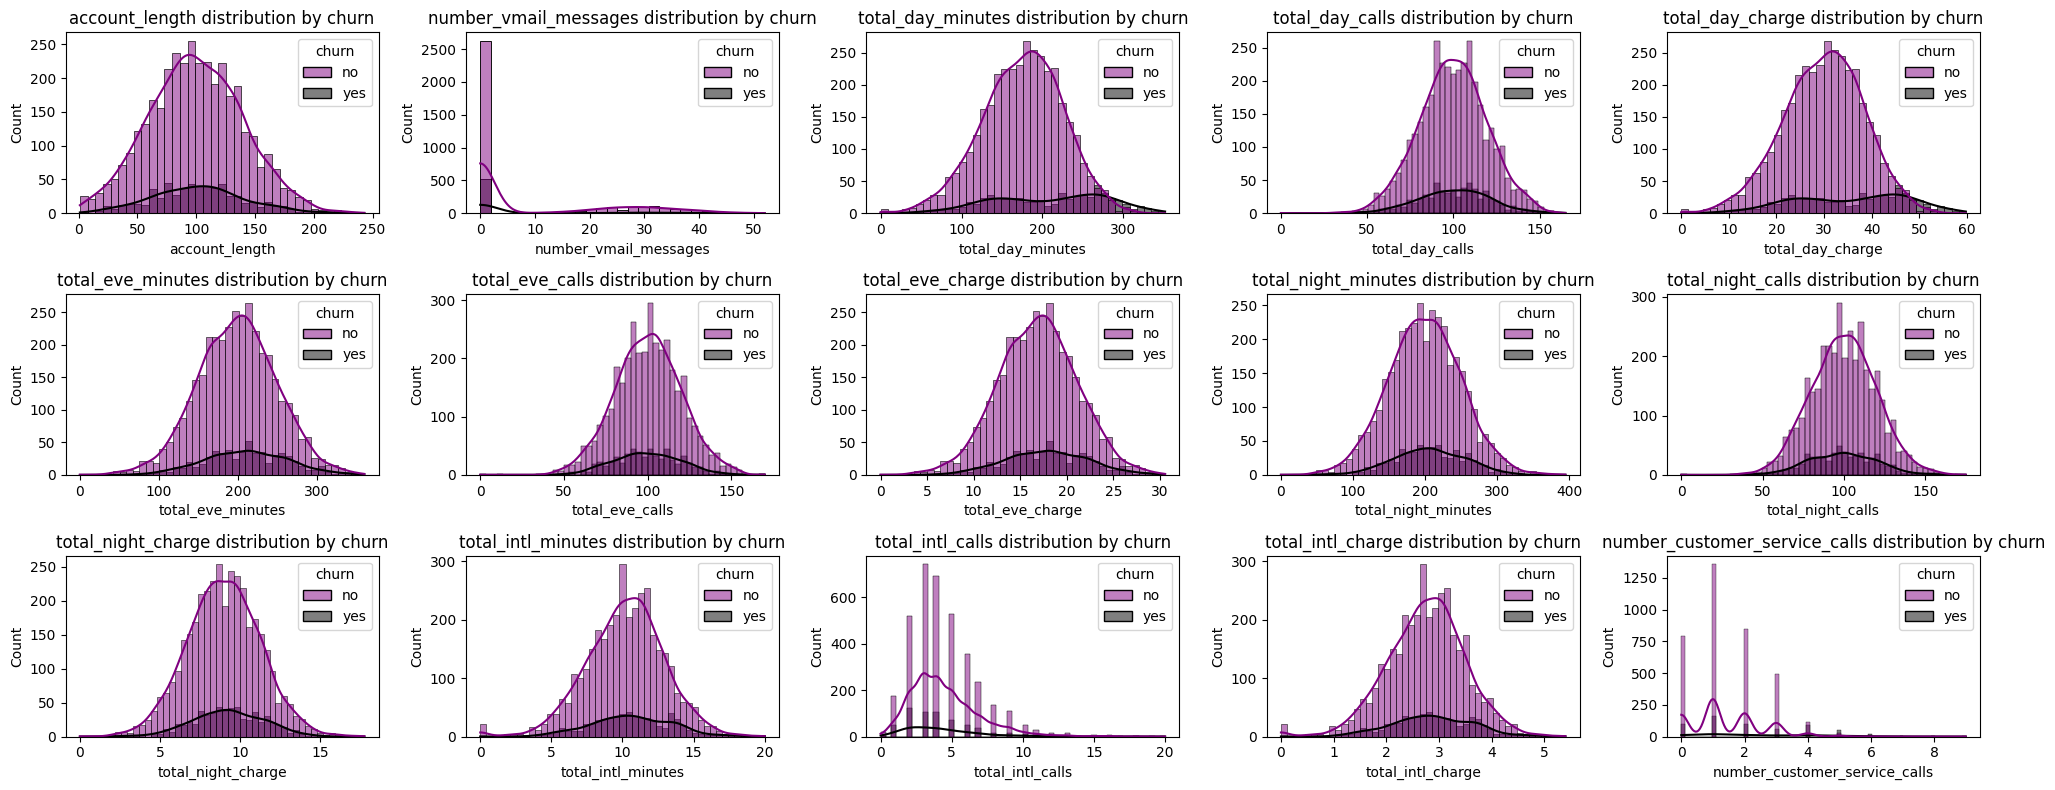

In [16]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df_train, x=col, hue='churn', palette=['purple', 'black'],
                 kde=True, fill=True).set(title=f'{col} distribution by churn')
plt.tight_layout()
plt.show()

### Histogram Visualization Function

The provided code generates histograms to visualize the distribution of numerical features in the dataset, differentiated by churn status.

**How it works:**
- It creates histograms for each numerical column in the dataset.
- Each histogram is labeled with the corresponding feature name.

**Insights:**
* The histogram visualizations indicate that the majority of data distributions in the dataset appear to be approximately normal.
* However, closer examination reveals that certain columns, including number_vmail_messages, total_intl_calls, and number_customer_service_calls, exhibit positive skewness.
* Despite the overall normal distribution pattern, these specific features display a tendency towards higher values, suggesting potential outliers or non-normal behavior in their distributions.



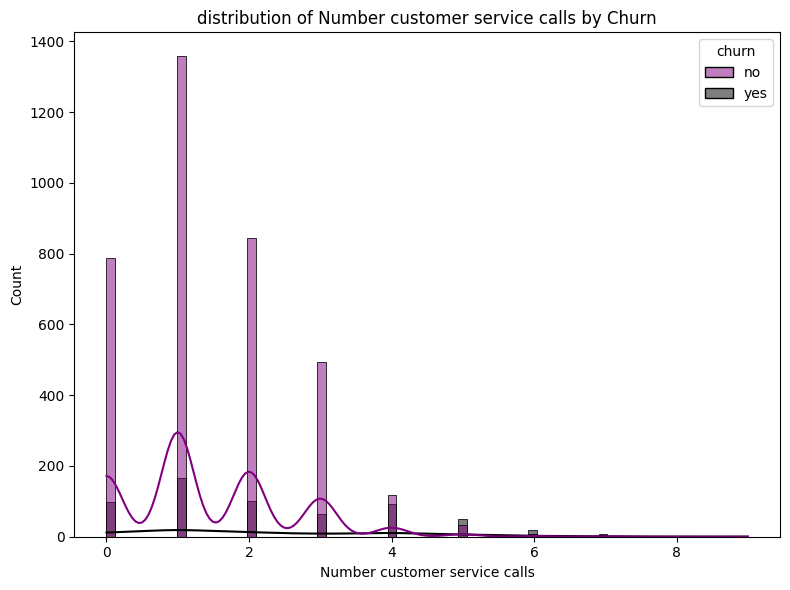

In [17]:
def plot_churn_distribution(df, x, hue, palette=['purple', 'black']):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=x, hue=hue, palette=palette, kde=True, fill=True)
    plt.title('distribution of ' + x.replace('_', ' ').capitalize() + ' by ' + hue.capitalize())
    plt.xlabel(x.replace('_', ' ').capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_churn_distribution(df_train, 'number_customer_service_calls', 'churn')

In [18]:
crosstab_function(df_train, 'number_customer_service_calls')

,number_customer_service_calls,total,churn_no,churn_yes,churn_percentage
0,0,789,97,886,10.948081
1,1,1358,166,1524,10.892388
2,2,845,102,947,10.770855
3,3,495,63,558,11.290323
4,4,117,92,209,44.019139
5,5,32,49,81,60.493827
6,6,9,19,28,67.857143
7,7,6,7,13,53.846154
8,8,1,1,2,50.000000
9,9,0,2,2,100.000000


**Insights:**
* The histogram reveals a noticeable increase in churn rate beginning from the 4th customer service call onwards, suggesting a potential correlation with declining customer service quality.


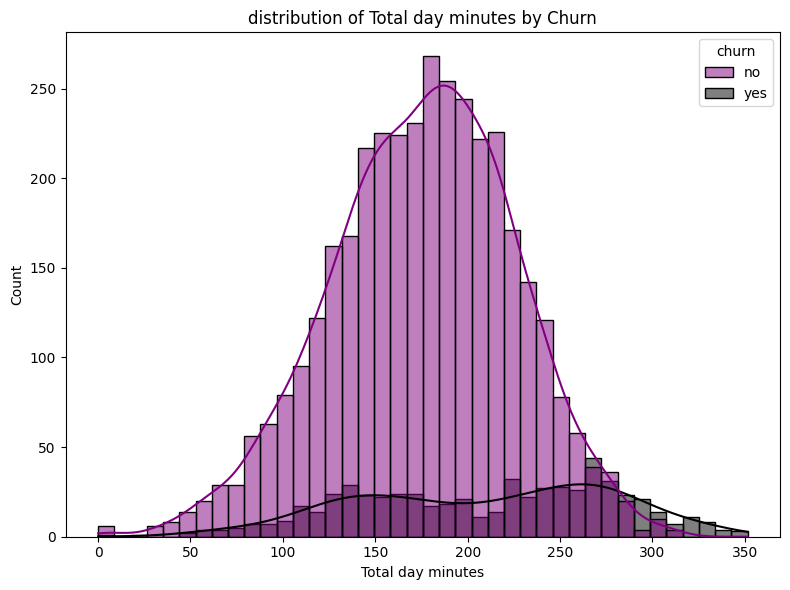

In [19]:
plot_churn_distribution(df_train, 'total_day_minutes', 'churn')

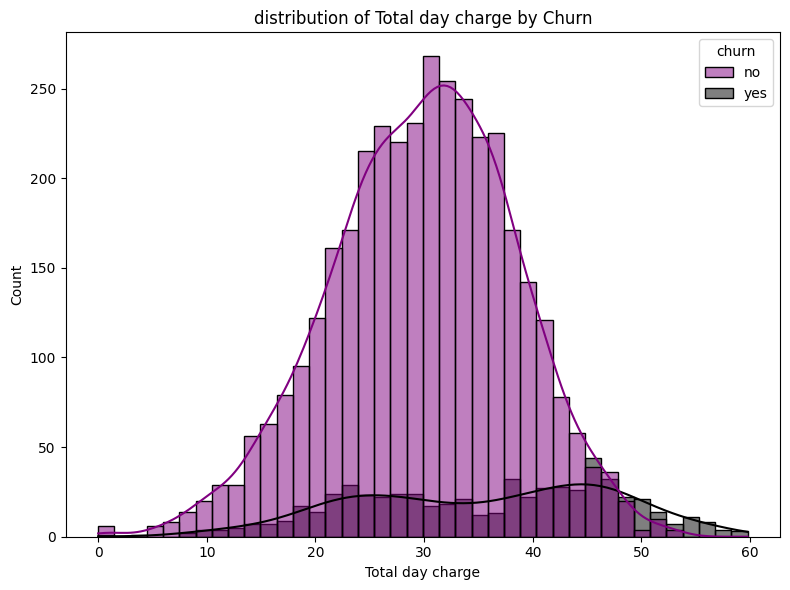

In [20]:
plot_churn_distribution(df_train, 'total_day_charge', 'churn')

**Insights:**

Higher call duration and cost during daytime are associated with an increased churn rate, particularly noticeable after exceeding 300 minutes.

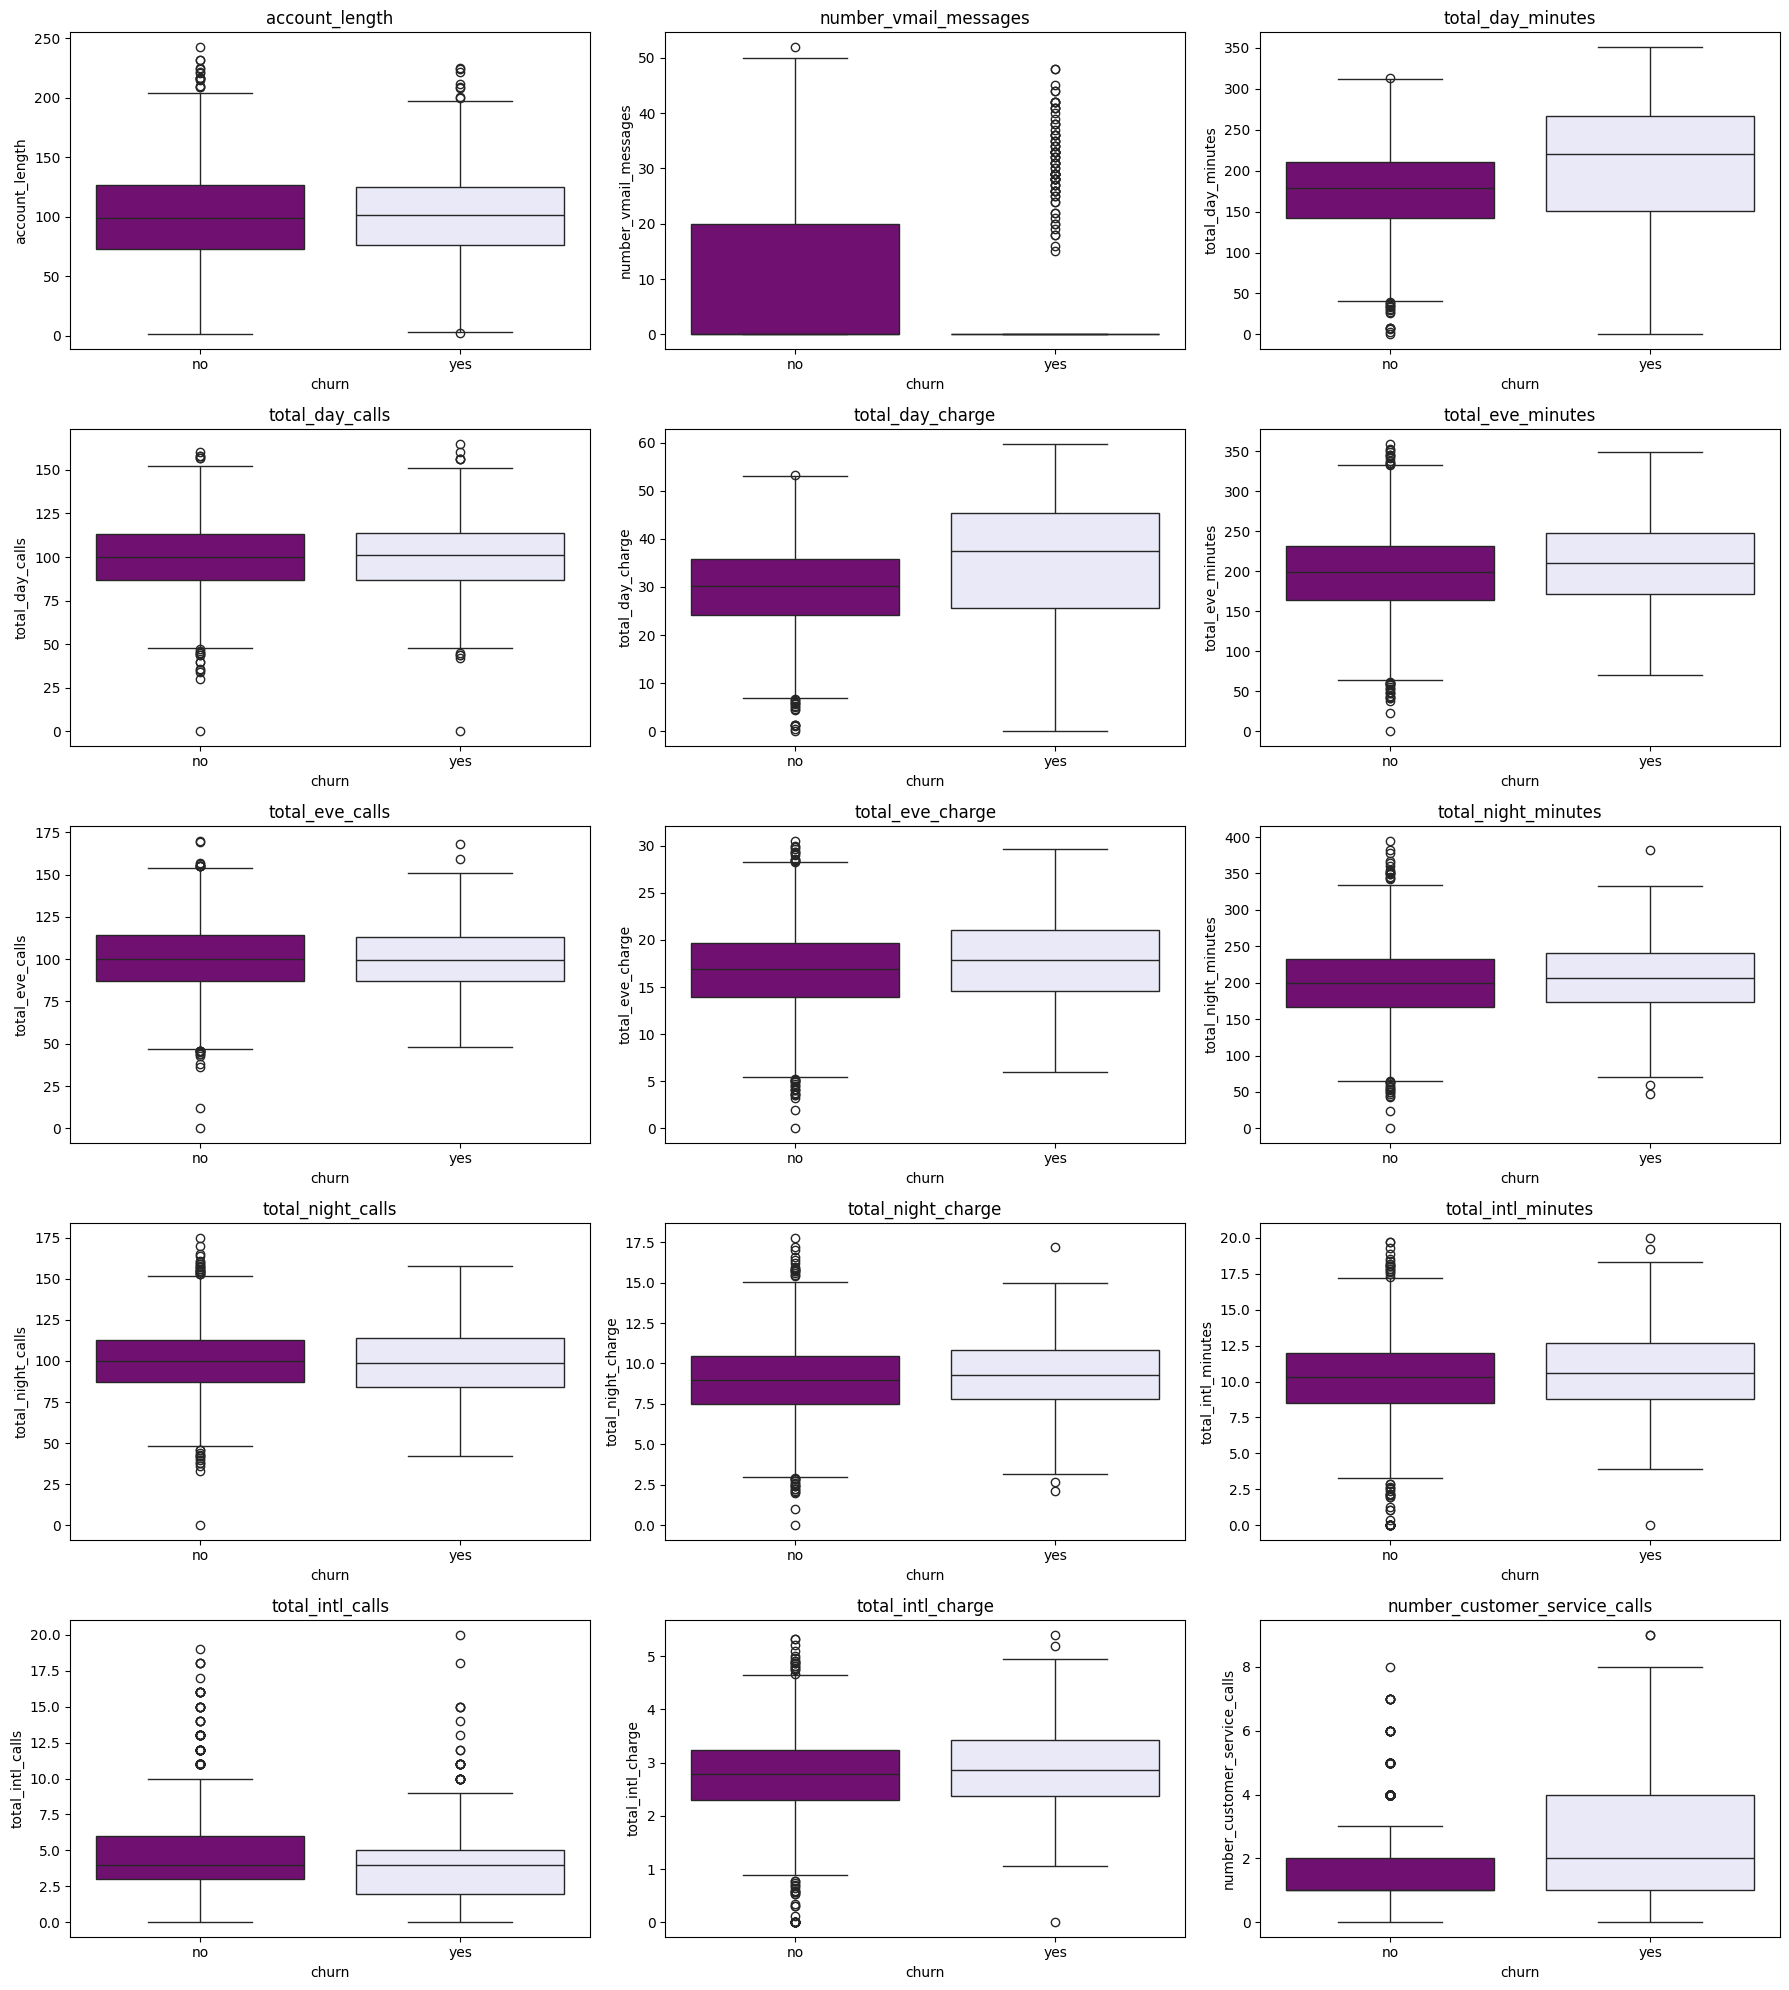

In [21]:
def plot_boxplots(df, num_cols, churn_col):
    num_subplots = len(num_cols)
    num_rows = (num_subplots + 2) // 3
    num_cols_subplot = min(num_subplots, 3)
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(num_cols_subplot * 6, num_rows * 4))
    custom_palette = ["purple", "lavender"]
    for i, col_name in enumerate(num_cols):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]
        sns.boxplot(x=churn_col, y=col_name, data=df, hue=churn_col, palette=custom_palette, ax=ax, legend=False)
        ax.set_title(col_name)
    plt.tight_layout()
    plt.show()
plot_boxplots(df_train, num_cols, 'churn')

### Boxplot Visualization Function

The `plot_boxplots` function generates boxplot visualizations for numerical columns in the DataFrame, grouped by the 'churn' column.

**Arguments:**
- `df`: DataFrame containing the data to be visualized.
- `num_cols`: List of numerical column names in the DataFrame.
- `churn_col`: Name of the column indicating churn status.

**Output:**
- Boxplot visualizations for each numerical column, grouped by churn status.

**How it works:**
- The function plots boxplots for each numerical column in `num_cols`, grouped by the 'churn' column.
- The number of subplots is determined based on the number of numerical columns.
- Custom color palette is used to distinguish churn status (purple for churn, lavender for non-churn).


# Data Preprocessing

In [22]:
total_duplicates = df_train.duplicated().sum()
total_missing_values = df_train.isnull().sum().sum()
print("Missing values per numeric column:")
print('\n', df_train.select_dtypes(include='number').isnull().sum())
print('\nTotal Duplicates:', total_duplicates)
print('Total Missing Values:', total_missing_values)

Missing values per numeric column:

 account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Total Duplicates: 0
Total Missing Values: 0


In [23]:
def detect_outliers(df_train, num_cols):
    outliers_dict = {}
    total_outliers = 0
    for col in num_cols:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df_train[col] < lower_bound) | (df_train[col] > upper_bound)).sum()
        outliers_dict[col] = outliers_count
        total_outliers += outliers_count

    return outliers_dict, total_outliers

### Outlier Detection Function

The `detect_outliers` function identifies outliers in numerical columns of a DataFrame using the Interquartile Range (IQR) method.

**Arguments:**
- `df_train`: DataFrame containing the data to be analyzed.
- `num_cols`: List of numerical column names in the DataFrame to check for outliers.

**Output:**
- `outliers_dict`: A dictionary containing the count of outliers for each numerical column.
- `total_outliers`: The total count of outliers across all numerical columns.

**How it works:**
1. Iterates through each numerical column specified in `num_cols`.
2. Calculates the first quartile (`Q1`), third quartile (`Q3`), and Interquartile Range (`IQR`) for each column.
3. Determines the lower bound (`lower_bound`) and upper bound (`upper_bound`) for outlier detection.
4. Counts the number of outliers in each column.
5. Stores the count of outliers for each column in a dictionary `outliers_dict`.
6. Calculates the total count of outliers across all numerical columns.
7. Returns both the dictionary of outliers counts and the total count of outliers.


In [24]:
outliers_dict, total_outliers = detect_outliers(df_train, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 20
number_vmail_messages: 86
total_day_minutes: 25
total_day_calls: 28
total_day_charge: 26
total_eve_minutes: 34
total_eve_calls: 24
total_eve_charge: 34
total_night_minutes: 37
total_night_calls: 33
total_night_charge: 37
total_intl_minutes: 62
total_intl_calls: 100
total_intl_charge: 62
number_customer_service_calls: 335
Total Outliers: 943


* **Insight:**
    - Outliers are present in all features, totaling 943 instances throughout the dataset.
    - Additionally, no missing or duplicate data entries were identified in the dataset.
        - This suggests that the dataset maintains integrity and completeness, facilitating reliable analysis.
    - To mitigate the impact of outliers, the chosen strategy involves replacing outlier values with the median value of the respective feature.
        - This approach aims to maintain the integrity of the dataset while minimizing the influence of extreme values on subsequent analyses and modeling.

In [25]:
df_out = df_train.copy()
def replace_outliers(df, labels):
    for label in labels:
        q1 = df_out[label].quantile(0.25)
        q3 = df_out[label].quantile(0.75)
        iqr = q3 - q1
        max_val = q3 + 1.5 * iqr
        min_val = q1 - 1.5 * iqr
        df_out[label] = np.where(df_out[label] > max_val, max_val, np.where(df_out[label] < min_val, min_val, df_out[label]))
        df_out[label] = df_out[label].mask(df_out[label] > max_val, df_out[label].mean())
    return df_out

### Outlier Replacement Function

The `replace_outliers` function aims to mitigate the influence of outliers in the dataset by replacing extreme values with more representative ones.


**How it works:**
- For each specified feature (`labels`):
    - The function calculates quartiles (Q1 and Q3) and the interquartile range (IQR) to establish thresholds for identifying outliers.
    - Outliers exceeding 1.5 times the IQR beyond the quartiles are identified and replaced.
        - Outliers above Q3 + 1.5 * IQR are replaced with the maximum non-outlier value.
        - Outliers below Q1 - 1.5 * IQR are replaced with the minimum non-outlier value.
    - Additionally, outliers are replaced with the median value of the feature to further normalize the data distribution.

**Output:**
- The function returns a modified DataFrame (`df_out`) with outlier values replaced.



In [26]:
df_cleaned = replace_outliers(df_out, num_cols)

In [27]:
outliers_dict, total_outliers = detect_outliers(df_cleaned, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 0
number_vmail_messages: 0
total_day_minutes: 0
total_day_calls: 0
total_day_charge: 0
total_eve_minutes: 0
total_eve_calls: 0
total_eve_charge: 0
total_night_minutes: 0
total_night_calls: 0
total_night_charge: 0
total_intl_minutes: 0
total_intl_calls: 0
total_intl_charge: 0
number_customer_service_calls: 0
Total Outliers: 0


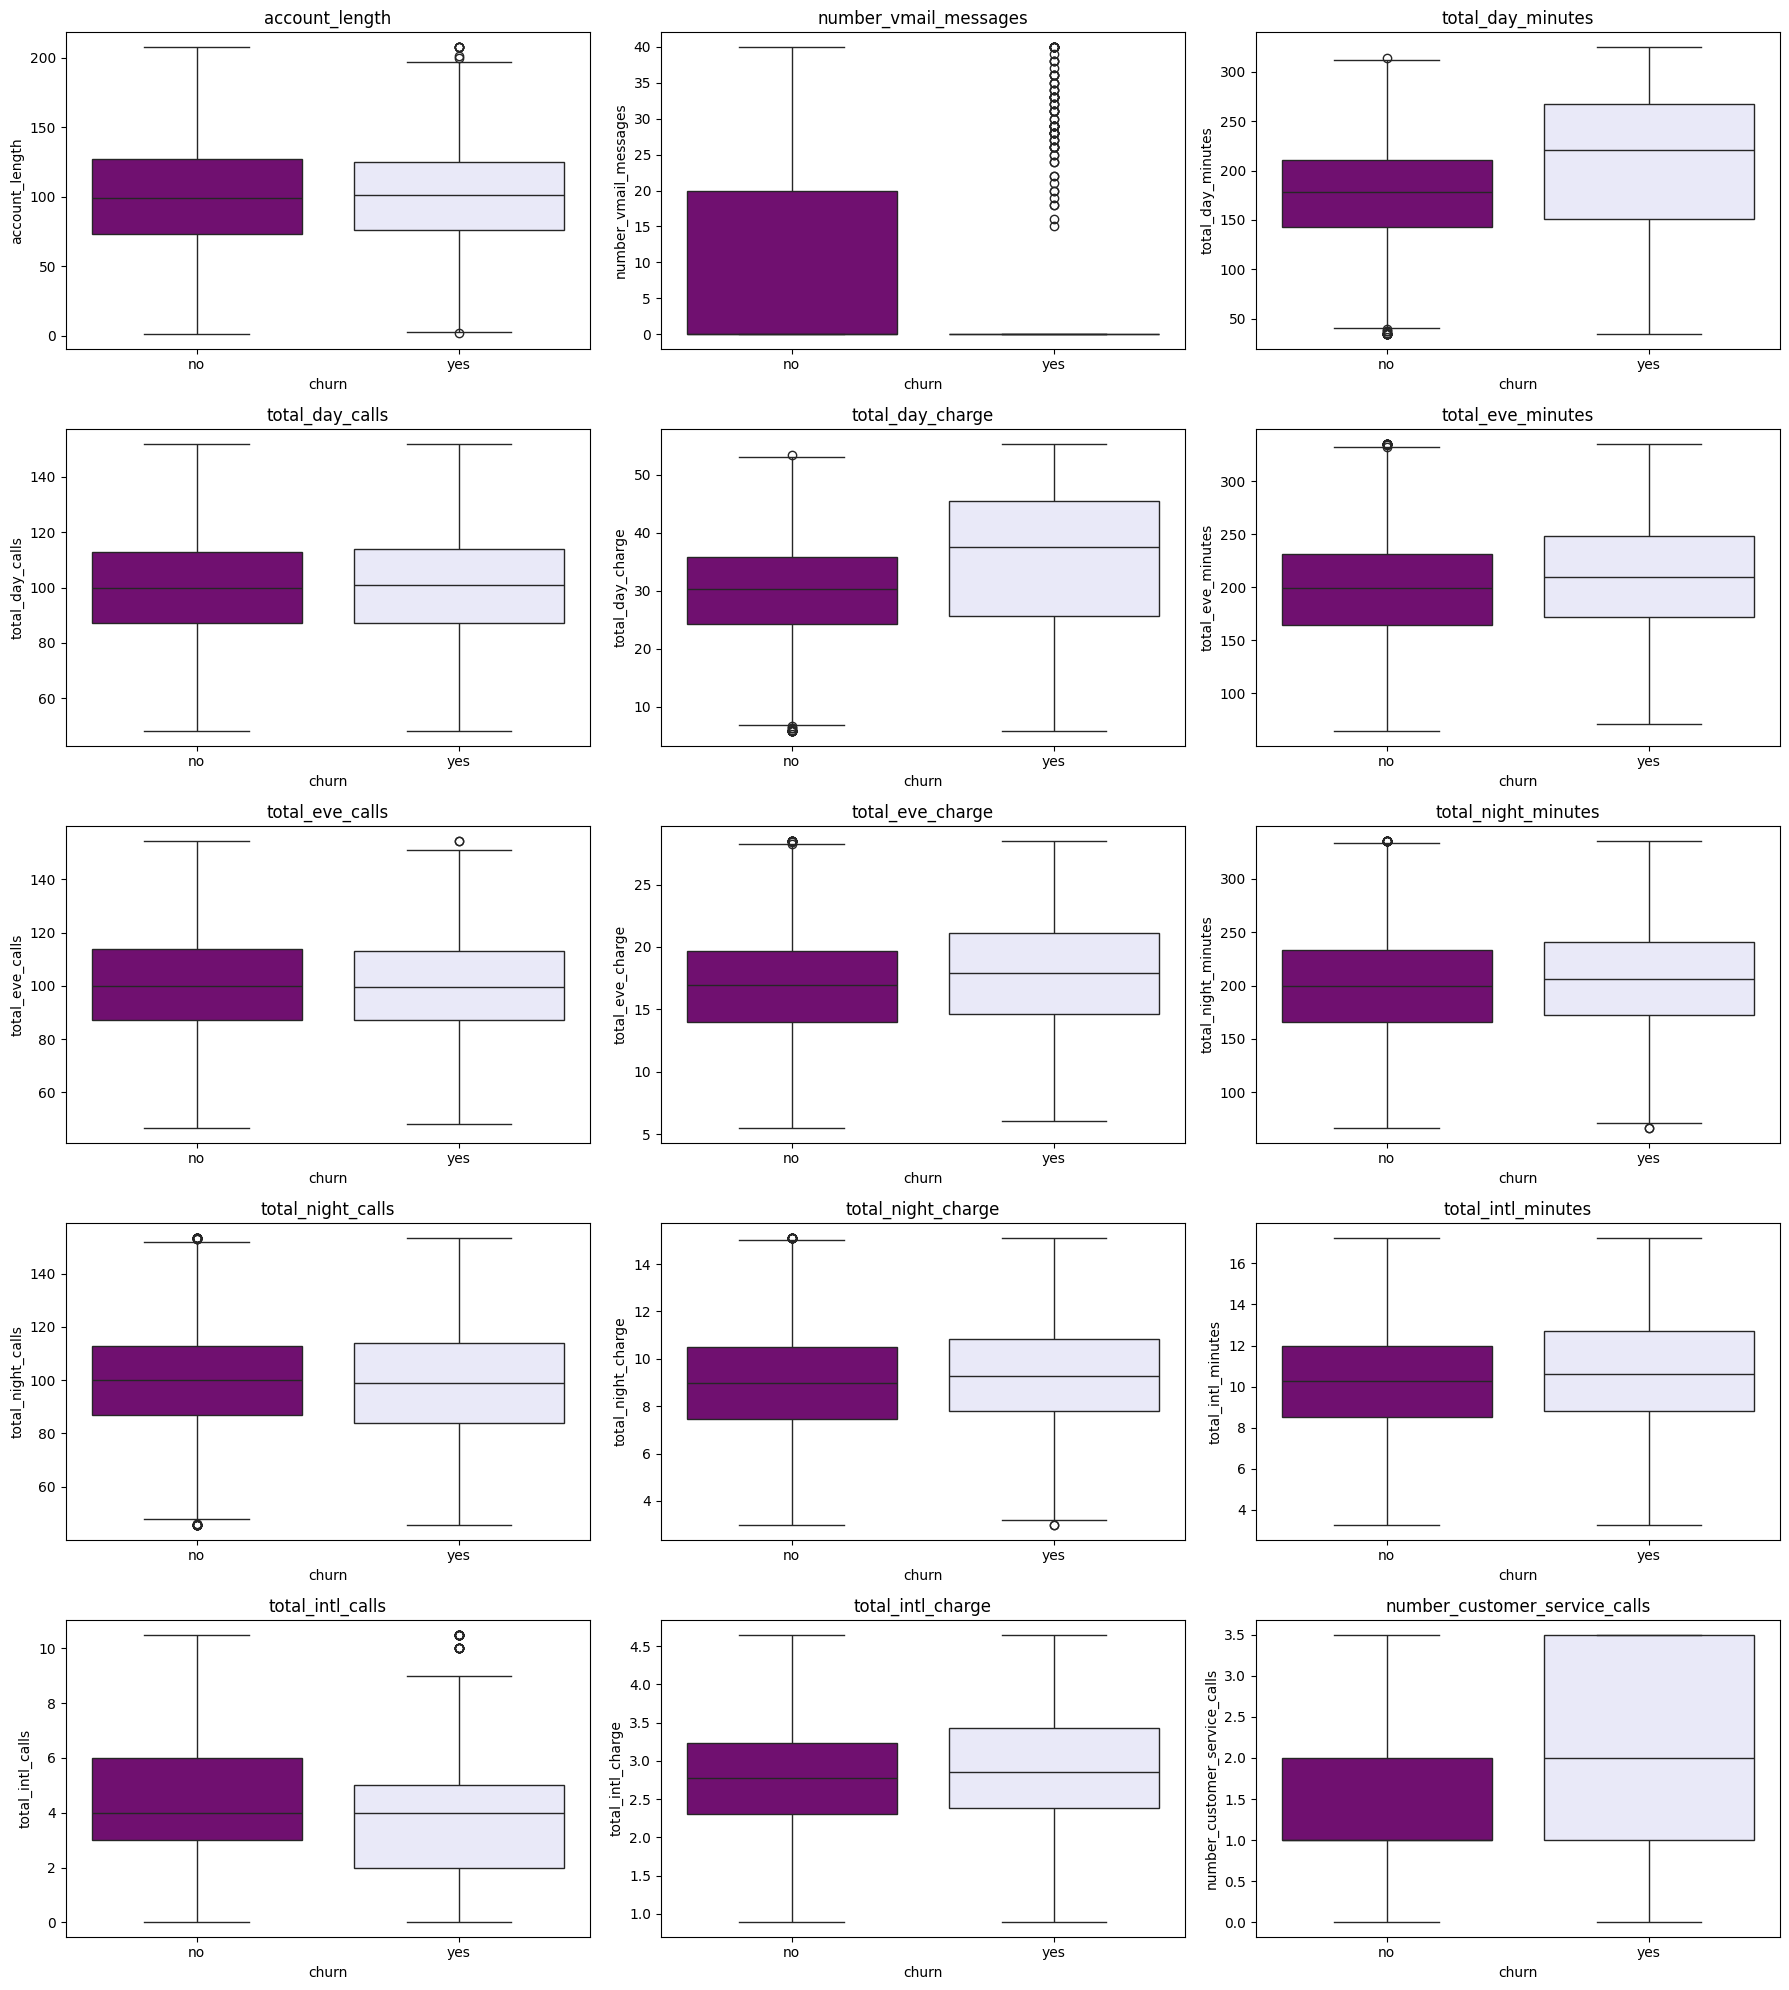

In [28]:
plot_boxplots(df_cleaned, num_cols, 'churn')

* Customer service call frequency, total day minutes, and total day charge significantly impact churn. Higher values in these features correlate with higher churn rates, suggesting dissatisfied customers may churn more frequently.
* Conversely, the number of voicemail messages appears to have no discernible effect on churn. Regardless of the number of voicemail messages, churn rates remain consistent, indicating this feature does not influence customer retention.


In [29]:
df_fe = df_cleaned.copy()

In [30]:
def feature_engineering(df):
    df['total_nat_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_nat_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_nat_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    df.drop(columns=['state', 'area_code', 'account_length', 'total_day_minutes', 'total_eve_minutes',
                     'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                     'total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)
    return df

In [31]:
feature_engineering(df_fe)

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_nat_minutes,total_nat_calls,total_nat_charge
0,no,yes,26.0,13.7,3.0,3.70,1.0,no,611.50,329.0,55.540
1,no,no,0.0,12.2,5.0,3.29,0.0,no,527.20,328.0,59.000
2,yes,no,0.0,6.6,7.0,1.78,2.0,no,560.45,248.0,65.215
3,yes,no,0.0,10.1,3.0,2.73,3.0,no,501.90,356.0,49.360
4,no,yes,24.0,7.5,7.0,2.03,3.0,no,766.35,314.0,75.175
...,...,...,...,...,...,...,...,...,...,...,...
4245,no,no,0.0,10.3,6.0,2.78,0.0,no,645.80,237.0,62.350
4246,no,no,0.0,11.5,6.0,3.11,3.0,no,495.30,260.0,49.770
4247,no,no,0.0,6.9,7.0,1.86,1.0,no,492.90,331.0,51.240
4248,no,yes,40.0,9.9,5.0,2.67,2.0,no,756.20,369.0,72.420


### Fitur Engineering

The `feature_engineering` function streamlines the dataset for analysis and modeling by removing columns that have minimal impact on churn prediction.

**How it works:**
- New features like `total_nat_minutes`, `total_nat_calls`, and `total_nat_charge` are computed by aggregating corresponding minute and charge features.
- Redundant columns such as 'state', 'area_code', and 'account_length' are eliminated to simplify the dataset.


**Purpose:**
- Enhances dataset clarity and model efficiency by removing irrelevant columns.


# Encoding

In [32]:
df_encode = df_fe.copy()

In [33]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = le.fit_transform(df[col])
    return df

### Function Description:
The `label_encode` function is designed to encode categorical columns in a DataFrame using scikit-learn's `LabelEncoder`. It iterates through each column of the DataFrame, checks if the column data type is 'object' (indicating categorical), and applies the `fit_transform` method of `LabelEncoder` to encode categorical values into numerical labels. The function returns the DataFrame with the encoded categorical columns.


In [34]:
df_clean_encoded = label_encode(df_encode)

In [35]:
df_clean_encoded.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_nat_minutes,total_nat_calls,total_nat_charge
0,0,1,26.0,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


In [36]:
df_clean = df_clean_encoded.copy()

# Correlation Heatmap

This code generates a correlation heatmap in a Jupyter notebook to visualize the pairwise correlations between features in the dataset, including those that have undergone one-hot encoding.

**Output:**
- The heatmap offers insights into feature relationships, aiding in pattern and correlation identification.

This code snippet provides a concise visualization of correlations, simplifying data exploration.


In [37]:
fig = px.imshow(df_clean.corr().round(2), color_continuous_scale='viridis', text_auto=True)
fig.update_layout(title='correlation heatmap',
                  showlegend=False,
                  height=1000,
                  width=1000)
fig.show()


* **Insight Correlation Observations:**
    - Strong correlation is observed between the minutes and charges features, indicating that call costs are positively correlated with call duration. This suggests that longer calls result in higher charges.
    - Features such as the international plan (0.26), total nat charge (0.23), total nat minutes (0.2) and number of customer service calls (0.17) exhibit significant correlations with churn. Higher values in these features tend to correlate with higher churn rates, indicating their potential impact on customer retention.
    - Additionally, a notable correlation is observed between the voice mail plan and the number of voicemail messages, suggesting that customers with a voicemail plan tend to receive more voicemail messages.


### Correlation with Churn

The provided code generates a bar chart to visualize the correlation of each feature with the target variable 'churn'.
**Output:**
- The chart provides insights into the correlation between each feature and the target variable 'churn', aiding in feature selection for churn prediction.



In [38]:
import plotly.graph_objects as go

df_clean_corr_churn = df_clean.corr()['churn'].sort_values(ascending=False)
fig = go.Figure(data=[go.Bar(x=df_clean_corr_churn.index, y=df_clean_corr_churn.values, marker_color='purple')])
fig.update_layout(title='correlation with churn', xaxis_title='features', yaxis_title='correlation')
fig.show()

**Insights:**

* **Positive Correlations with Churn**
    - The international plan, total day minutes, total day charge, and number of customer service calls exhibit positive correlations with churn. Higher values in these features tend to correlate with higher churn rates, suggesting their potential impact on customer attrition.

* **Negative Correlation with Churn**
    - Conversely, the voice mail plan shows a negative correlation with churn. As the frequency of 'no' values for the voicemail plan increases, churn rates also tend to increase. This indicates that customers without a voicemail plan are more likely to churn.

# Data Splitting

In [39]:
df_prep = df_clean.copy()

In [40]:
from sklearn.model_selection import train_test_split

x = df_prep.drop('churn',axis=1).values
y = df_prep.churn.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(3400, 10) (850, 10)


The code splits the preprocessed dataset into training and testing sets with an 80-20 ratio and prints their shapes for verification.

# Data Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Data Modelling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

In [54]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
roc_auc_list = []

def evaluate_model(algorithm, model_name, x_train, y_train, x_test, y_test):
    model = algorithm.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    evaluate_predictions(y_train, y_train_pred, 'Training', model_name)
    evaluate_predictions(y_test, y_test_pred, 'Testing', model_name)

    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1 = round(f1_score(y_test, y_test_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_test_pred), 3)

    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    roc_auc_list.append(roc_auc)

    return model


### Function Description:

The `evaluate_model` function evaluates a machine learning algorithm/model by training it on the provided training data (`x_train`, `y_train`) and then testing its performance on the provided testing data (`x_test`, `y_test`). It computes various evaluation metrics such as accuracy, precision, recall, F1 score, and ROC AUC score for both training and testing datasets. The function returns the trained model along with the computed evaluation metrics. Additionally, it appends the model name and evaluation metrics to separate lists (`model_list`, `accuracy_list`, etc.) for further analysis and comparison. This function facilitates the systematic evaluation and comparison of machine learning models.

In [55]:
def evaluate_predictions(y_true, y_pred, dataset_type, model_name):
    print(f'\nClassification Report for {dataset_type} Dataset using {model_name} Model:')
    print(classification_report(y_true, y_pred))
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred),
                                       index=['Not Churn', 'Churn'],
                                       columns=['Not Churn', 'Churn'])
    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title(f'Confusion Matrix for {dataset_type} Dataset using {model_name} Model', fontsize=18, color='black')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()

### Function Description:

The `evaluate_predictions` function generates a classification report and a confusion matrix plot to evaluate the performance of a machine learning model.

It takes the true labels (`y_true`) and predicted labels (`y_pred`) as input, along with information about the dataset type (`dataset_type`) and the model name (`model_name`).

The function prints a classification report and visualizes the confusion matrix as a heatmap. This function helps assess the accuracy and effectiveness of classification models.

In [56]:
def get_models():
    return {
        'Logistic Regression': LogisticRegression,
        'K-Nearest Neighbor': KNeighborsClassifier,
        'Decision Tree': DecisionTreeClassifier,
        'Random Forest': RandomForestClassifier,
        'Neural Network': MLPClassifier,
        'Gradient Boosting': GradientBoostingClassifier
    }

### Function Description:

The `get_models` function returns a dictionary containing various machine learning models commonly used for classification tasks.

Each key-value pair in the dictionary represents a model name and its corresponding model class. The models included are:

- Logistic Regression
- K-Nearest Neighbor
- Decision Tree
- Random Forest
- Neural Network (Multi-layer Perceptron)
- Gradient Boosting

This function provides a convenient way to access different models for building and evaluating classification models within a machine learning workflow.

Evaluating Logistic Regression...

Classification Report for Training Dataset using Logistic Regression Model:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2931
           1       0.51      0.09      0.16       469

    accuracy                           0.86      3400
   macro avg       0.69      0.54      0.54      3400
weighted avg       0.82      0.86      0.82      3400



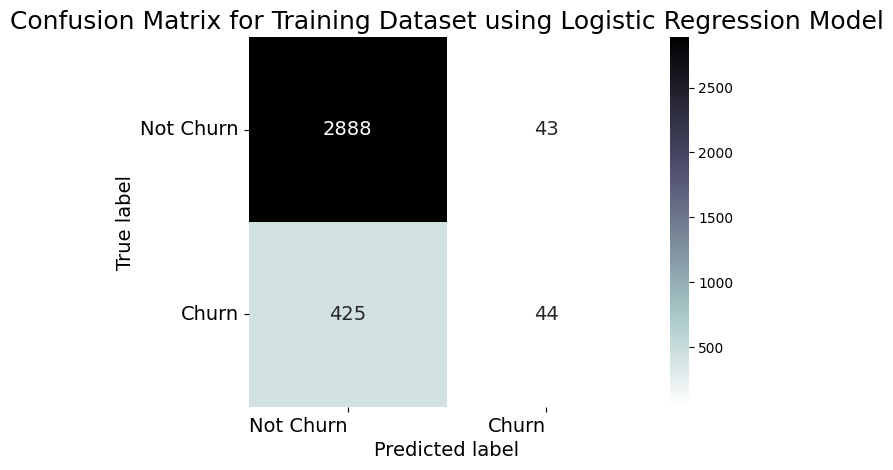


Classification Report for Testing Dataset using Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       721
           1       0.55      0.12      0.20       129

    accuracy                           0.85       850
   macro avg       0.71      0.55      0.56       850
weighted avg       0.82      0.85      0.81       850



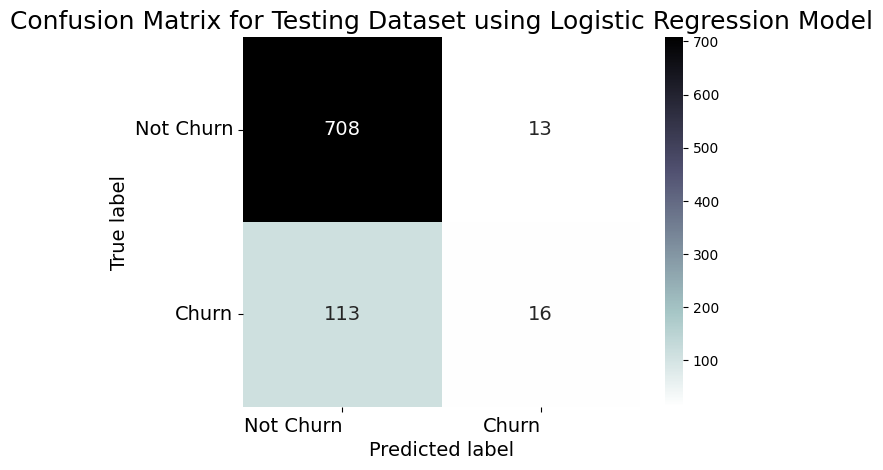

Evaluating K-Nearest Neighbor...

Classification Report for Training Dataset using K-Nearest Neighbor Model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2931
           1       0.83      0.37      0.51       469

    accuracy                           0.90      3400
   macro avg       0.87      0.68      0.73      3400
weighted avg       0.90      0.90      0.89      3400



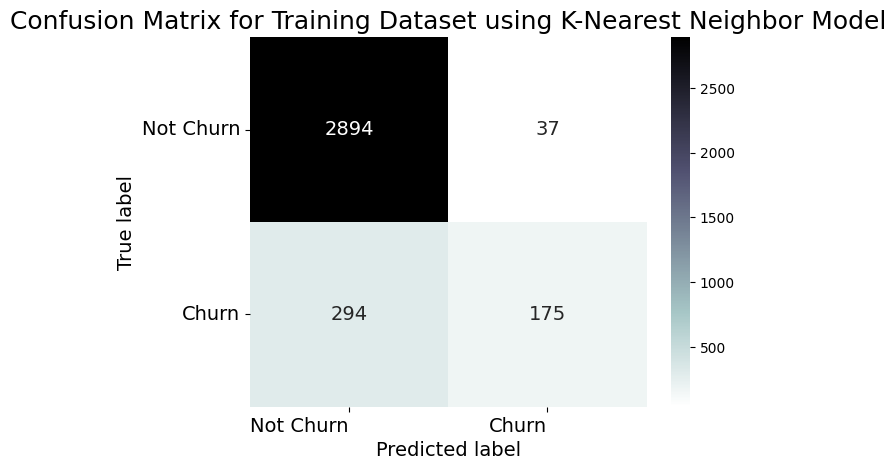


Classification Report for Testing Dataset using K-Nearest Neighbor Model:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       721
           1       0.67      0.31      0.42       129

    accuracy                           0.87       850
   macro avg       0.78      0.64      0.68       850
weighted avg       0.85      0.87      0.85       850



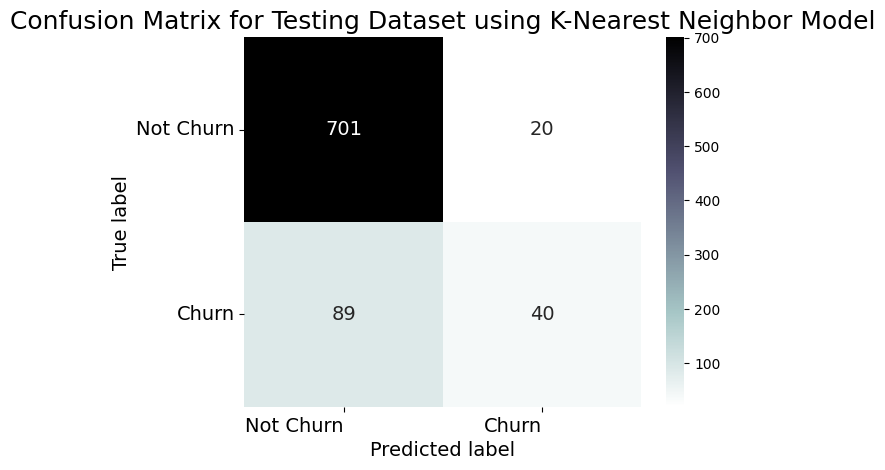

Evaluating Decision Tree...

Classification Report for Training Dataset using Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



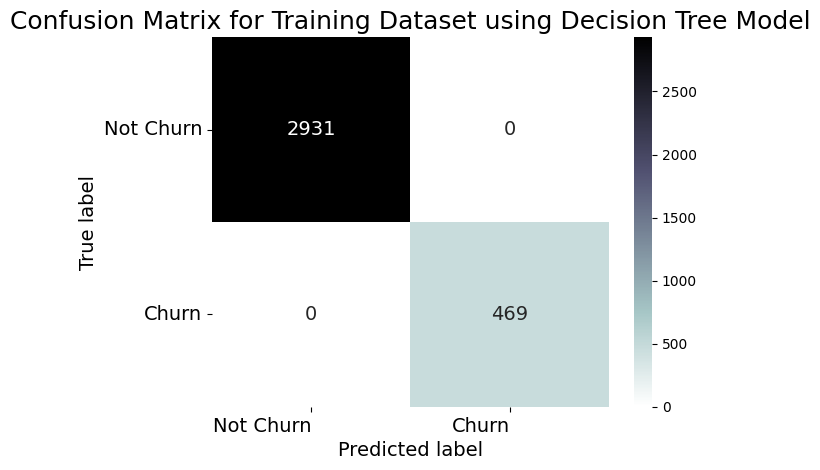


Classification Report for Testing Dataset using Decision Tree Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.83      0.85      0.84       129

    accuracy                           0.95       850
   macro avg       0.90      0.91      0.91       850
weighted avg       0.95      0.95      0.95       850



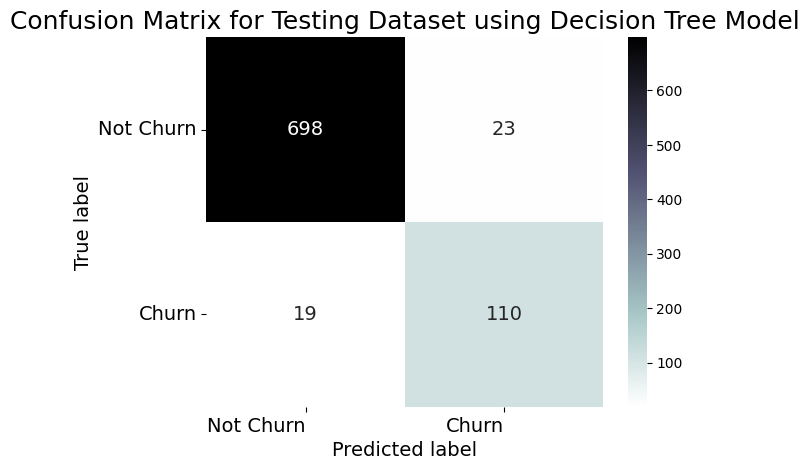

Evaluating Random Forest...

Classification Report for Training Dataset using Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



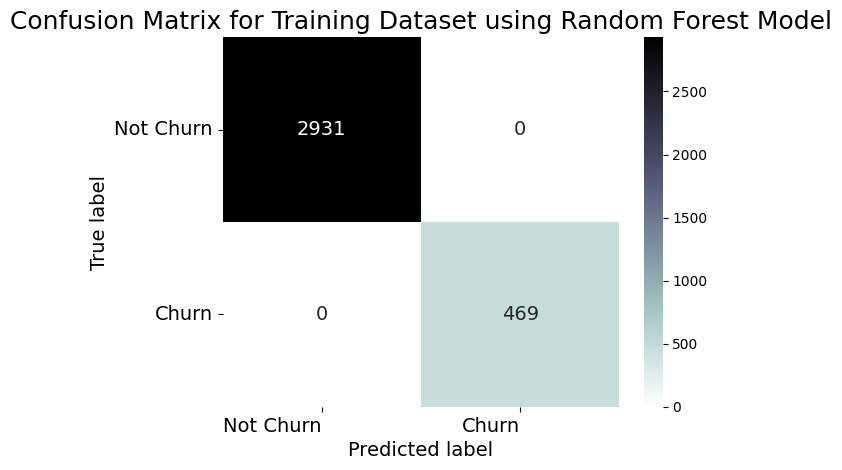


Classification Report for Testing Dataset using Random Forest Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       721
           1       0.97      0.87      0.91       129

    accuracy                           0.98       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.98      0.98      0.97       850



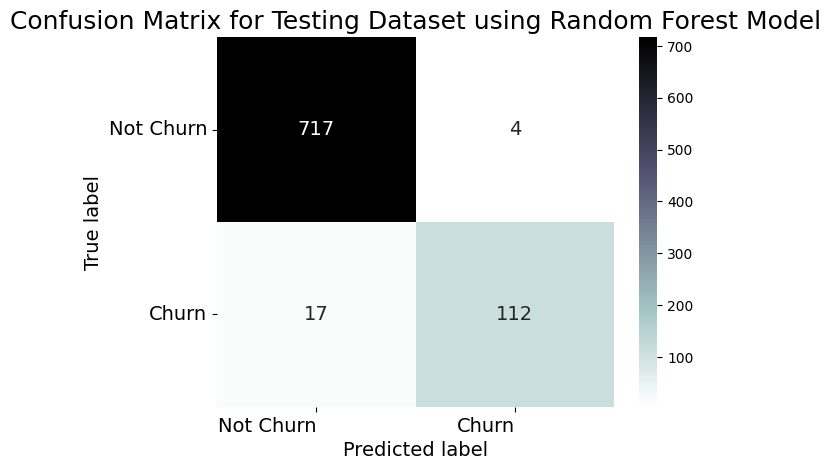

Evaluating Neural Network...

Classification Report for Training Dataset using Neural Network Model:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2931
           1       0.52      0.38      0.44       469

    accuracy                           0.87      3400
   macro avg       0.71      0.66      0.68      3400
weighted avg       0.85      0.87      0.86      3400



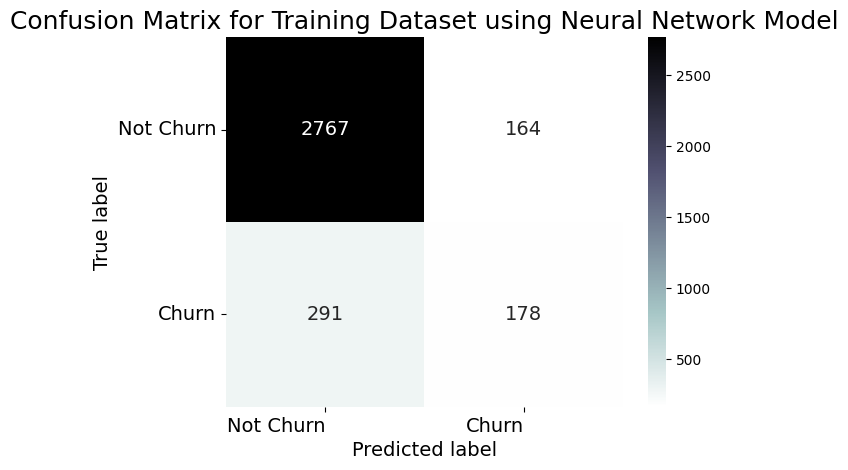


Classification Report for Testing Dataset using Neural Network Model:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       721
           1       0.56      0.42      0.48       129

    accuracy                           0.86       850
   macro avg       0.73      0.68      0.70       850
weighted avg       0.85      0.86      0.85       850



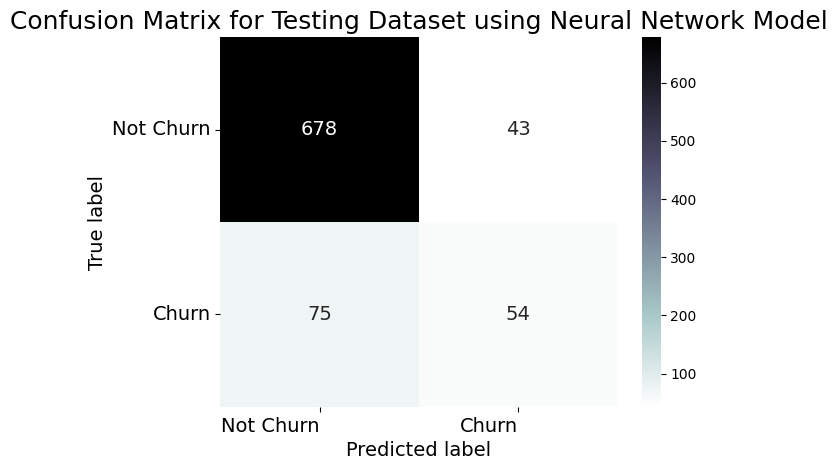

Evaluating Gradient Boosting...

Classification Report for Training Dataset using Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2931
           1       1.00      0.87      0.93       469

    accuracy                           0.98      3400
   macro avg       0.99      0.93      0.96      3400
weighted avg       0.98      0.98      0.98      3400



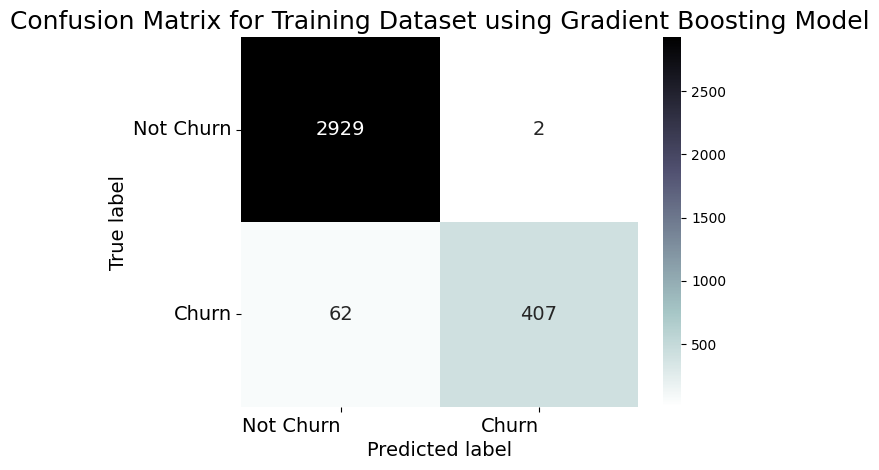


Classification Report for Testing Dataset using Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       721
           1       0.96      0.87      0.91       129

    accuracy                           0.97       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.97      0.97      0.97       850



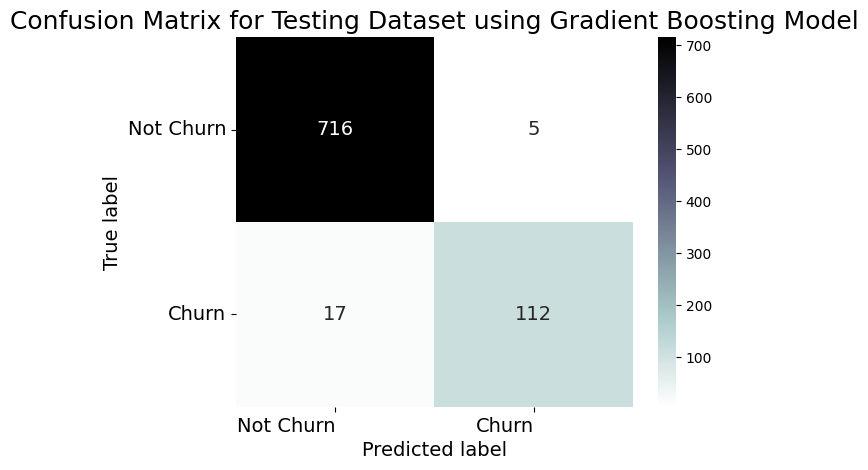

In [57]:
models = get_models()

for model_name, model_class in models.items():
    print(f"Evaluating {model_name}...")
    model = model_class()
    evaluate_model(model, model_name, x_train, y_train, x_test, y_test)

In [58]:
evaluation_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'ROC AUC': roc_auc_list
})

print("Evaluation Scores:")
evaluation_df

Evaluation Scores:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.852,0.552,0.124,0.203,0.553
1,K-Nearest Neighbor,0.872,0.667,0.310,0.423,0.641
2,Decision Tree,0.951,0.827,0.853,0.840,0.910
3,Random Forest,0.975,0.966,0.868,0.914,0.931
4,Neural Network,0.861,0.557,0.419,0.478,0.679
5,Gradient Boosting,0.974,0.957,0.868,0.911,0.931


# Prediction

In [59]:
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv


In [60]:
df_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [62]:
df_test_copy = df_test.copy()


In [63]:
df_test_encode = label_encode(df_test_copy)

In [64]:
df_test_prep = feature_engineering(df_test_encode)
df_test_prep.head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge
0,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [65]:
df_pred = df_test_prep.drop('id', axis=1)
df_pred.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_nat_minutes,total_nat_calls,total_nat_charge
0,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [66]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             750 non-null    int64  
 1   voice_mail_plan                750 non-null    int64  
 2   number_vmail_messages          750 non-null    int64  
 3   total_intl_minutes             750 non-null    float64
 4   total_intl_calls               750 non-null    int64  
 5   total_intl_charge              750 non-null    float64
 6   number_customer_service_calls  750 non-null    int64  
 7   total_nat_minutes              750 non-null    float64
 8   total_nat_calls                750 non-null    int64  
 9   total_nat_charge               750 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 58.7 KB


In [67]:
def predict(model_name, df_pred, x_train=None, y_train=None):
    models = get_models()
    if model_name not in models:
        print(f"Error: Model {model_name} not found.")
        return None

    model_class = models[model_name]
    model = model_class()

    if x_train is not None and y_train is not None:
        model.fit(x_train, y_train)

    predict = model.predict(df_pred)
    predicted_labels = ['yes' if pred == 1 else 'no' for pred in predict]
    results_subset = pd.DataFrame(predicted_labels, columns=['churn'])
    print('Model used:', model)
    return results_subset


In [71]:
rf_predict = predict('Random Forest', df_pred, x_train, y_train)
rf_predict.value_counts()

Model used: RandomForestClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



churn
no       657
yes       93
dtype: int64